# Ejercicio 1

Partiendo del conjunto de datos en train y test, estudiar a nivel descriptivo ambos sets por separado.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Para separar en Train / Test
from sklearn import preprocessing  # Para estandarizar
import seaborn as sns
import matplotlib.pyplot as plt


Información sobre los datos, obtenida de aquí: housing data description.txt

In [2]:
info = open(r'housing data description.txt', 'r')
print(info.read())

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [3]:
col_title = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [4]:
pisos_Boston = pd.read_csv(r'housing data.csv', names = col_title)

In [5]:
pisos_Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Tenemos 506 registros, todos ellos, numéricos, siendo algunos enteros y otros "floats". Tienen órdenes de magnitud bastante diferentes. Podemos comprobar también que, en principio, no hay valores nulos.

Hay una variable binaria "CHAS", que indica la cercanía o no al río Charles, y que no consideraremos para trabajar con las demás variables, que según la descripción en el fichero "housing data description.txt" son todas continuas.

In [6]:
pisos_Boston.drop(columns='CHAS', inplace=True)

In [7]:
pisos_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


Creamos las muestras "train" y "test":

In [8]:
p_Boston_train, p_Boston_test = train_test_split(pisos_Boston, test_size=0.2)

In [9]:
p_Boston_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
106,0.17120,0.0,8.56,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66,19.5
501,0.06263,0.0,11.93,0.5730,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
452,5.09017,0.0,18.10,0.7130,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1
364,3.47428,0.0,18.10,0.7180,8.780,82.9,1.9047,24,666.0,20.2,354.55,5.29,21.9
236,0.52058,0.0,6.20,0.5070,6.631,76.5,4.1480,8,307.0,17.4,388.45,9.54,25.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,4.75237,0.0,18.10,0.7130,6.525,86.5,2.4358,24,666.0,20.2,50.92,18.13,14.1
54,0.01360,75.0,4.00,0.4100,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9
204,0.02009,95.0,2.68,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
28,0.77299,0.0,8.14,0.5380,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4


In [10]:
p_Boston_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
376,15.28800,0.0,18.10,0.671,6.649,93.3,1.3449,24,666.0,20.2,363.02,23.24,13.9
388,14.33370,0.0,18.10,0.700,4.880,100.0,1.5895,24,666.0,20.2,372.92,30.62,10.2
207,0.25199,0.0,10.59,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,22.5
363,4.22239,0.0,18.10,0.770,5.803,89.0,1.9047,24,666.0,20.2,353.04,14.64,16.8
225,0.52693,0.0,6.20,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.13587,0.0,10.59,0.489,6.064,59.1,4.2392,4,277.0,18.6,381.32,14.66,24.4
397,7.67202,0.0,18.10,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92,8.5
41,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,3,233.0,17.9,385.41,4.84,26.6
85,0.05735,0.0,4.49,0.449,6.630,56.1,4.4377,3,247.0,18.5,392.30,6.53,26.6


In [11]:
p_Boston_train.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.388761,12.325495,10.802946,0.549309,6.322584,67.513861,3.888322,9.210396,402.247525,18.410396,358.105941,12.331683,22.851238
std,8.416519,24.180563,6.815542,0.114819,0.689987,28.931958,2.115026,8.501513,164.857930,2.212247,91.318679,7.081356,9.315425
min,0.006320,0.000000,0.460000,0.385000,4.138000,6.200000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000,5.000000
25%,0.080050,0.000000,5.130000,0.447000,5.913750,41.400000,2.109150,4.000000,279.750000,16.975000,376.092500,6.832500,17.200000
50%,0.229480,0.000000,8.560000,0.532000,6.229500,76.800000,3.366650,5.000000,330.000000,19.000000,391.465000,10.585000,21.400000
75%,2.660102,20.000000,18.100000,0.624000,6.626250,94.150000,5.400700,8.000000,666.000000,20.200000,396.540000,16.530000,26.250000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
p_Boston_test.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.503758,7.553922,12.459020,0.576028,6.134324,72.777451,3.425584,10.892157,431.960784,18.634314,351.002549,13.925980,21.271569
std,9.288736,19.191570,6.911171,0.118148,0.734957,24.484842,2.036757,9.402872,181.296591,1.966426,91.428860,7.269001,8.641305
min,0.010960,0.000000,1.520000,0.389000,3.561000,2.900000,1.344900,1.000000,187.000000,13.000000,3.650000,1.730000,5.000000
25%,0.092633,0.000000,6.020000,0.475000,5.843750,58.700000,1.912425,4.000000,279.000000,17.800000,373.297500,7.862500,15.775000
50%,0.501200,0.000000,11.260000,0.576500,6.098500,79.200000,2.701250,5.000000,394.500000,19.150000,391.395000,13.465000,20.800000
75%,4.770820,0.000000,18.100000,0.679000,6.532500,92.675000,4.256300,24.000000,666.000000,20.200000,395.105000,17.872500,24.050000
max,67.920800,90.000000,27.740000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


Ojo! Hay que tener en cuenta que cuando -aunque no se llega hasta ahí en este sprint- hagamos uso de la muestra "test", habrá que eliminar la variable objetivo.

Es decir, si por ejemplo usamos la muestra "train" para predecir el valor mediano de las moradas ("MEDV"), eliminaremos el contenido de la columna "MEDV", que al fin y al cabo es lo que nos ha de dar la predicción que se efectúe.

# Ejercicio 2


Aplicar algún proceso de transformación: estandarizar los datos numéricos, crear nuevas columnas, dummies...

Hemos visto que teníamos variables numéricas "continuas" según la descripción de los datos en el .txt (aunque hay algún "integer"), y hemos visto que algunas tienen órdenes de magnitud muy diferentes.

Por lo tanto podríamos aplicar por ejemplo una estandarización. Lo aplicaremos por igual a los datos "train" y a los datos "test".

In [13]:
scaler_train = preprocessing.StandardScaler().fit(p_Boston_train)  # Hacemos que el "scaler" ajuste los datos...

In [14]:
scaler_train.mean_  # Medias calculadas por el scaler.

array([  3.38876141,  12.32549505,  10.80294554,   0.54930891,
         6.32258416,  67.51386139,   3.88832178,   9.21039604,
       402.24752475,  18.41039604, 358.10594059,  12.33168317,
        22.85123762])

In [15]:
scaler_train.scale_  # "Escalado" que aplicará el scaler.

array([8.40609647e+00, 2.41506179e+01, 6.80710142e+00, 1.14677235e-01,
       6.89132440e-01, 2.88961285e+01, 2.11240631e+00, 8.49098478e+00,
       1.64653772e+02, 2.20950710e+00, 9.12055909e+01, 7.07258640e+00,
       9.30388897e+00])

In [16]:
p_Boston_train_sc = scaler_train.transform(p_Boston_train)  # Con el scaler listo, aplicamos la estandarización.

In [17]:
p_Boston_train_sc  # Hemos de reconstituirlo como dataframe de pandas, ya que ha quedado convertido en array de numpy.

array([[-0.38276523, -0.51035941, -0.32950083, ...,  0.41186137,
         0.89476699, -0.36019751],
       [-0.39568085, -0.51035941,  0.16557039, ...,  0.37151296,
        -0.37633802, -0.04849989],
       [ 0.20240174, -0.51035941,  1.07197675, ...,  0.29585971,
         0.69823351, -0.72563609],
       ...,
       [-0.40074146,  3.42328736, -1.19330462, ...,  0.35572446,
        -1.33638285,  2.91800154],
       [-0.31117552, -0.51035941, -0.3912011 , ...,  0.32710779,
         0.06621578, -0.47842764],
       [-0.39490998,  1.35294695, -1.08165651, ...,  0.3465145 ,
        -1.08046516,  0.82210379]])

In [18]:
p_Boston_train_sc  = pd.DataFrame(p_Boston_train_sc , columns=list(pisos_Boston.columns))

In [19]:
p_Boston_train_sc

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.382765,-0.510359,-0.329501,-0.255577,-0.706082,0.843924,-0.794034,-0.495867,-0.110824,1.126769,0.411861,0.894767,-0.360198
1,-0.395681,-0.510359,0.165570,0.206589,0.392400,0.054891,-0.667354,-0.966955,-0.784965,1.172028,0.371513,-0.376338,-0.048500
2,0.202402,-0.510359,1.071977,1.427407,-0.037125,0.840463,-0.719616,1.741801,1.601861,0.809956,0.295860,0.698234,-0.725636
3,0.010173,-0.510359,1.071977,1.471008,3.565956,0.532464,-0.939034,1.741801,1.601861,0.809956,-0.038988,-0.995631,-0.102241
4,-0.341203,-0.510359,-0.676198,-0.368939,0.447542,0.310981,0.122930,-0.142551,-0.578472,-0.457295,0.332700,-0.394719,0.241701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.162217,-0.510359,1.071977,1.427407,0.293726,0.657048,-0.687615,1.741801,1.601861,0.809956,-3.368060,0.819830,-0.940600
400,-0.401514,2.595151,-0.999389,-1.214791,-0.630625,-0.689153,1.624393,-0.731411,0.405411,1.217287,0.425347,0.348998,-0.424687
401,-0.400741,3.423287,-1.193305,-1.161599,2.483435,-1.232479,0.582122,-0.613639,-1.082560,-1.679287,0.355724,-1.336383,2.918002
402,-0.311176,-0.510359,-0.391201,-0.098615,0.250193,0.930441,0.268120,-0.613639,-0.578472,1.172028,0.327108,0.066216,-0.478428


Y podemos hacer lo mismo también para los datos de "test".

In [20]:
scaler_test = preprocessing.StandardScaler().fit(p_Boston_test)  # Hacemos que el "scaler" ajuste los datos...

In [21]:
scaler_test.mean_  # Medias calculadas por el scaler.

array([  4.50375794,   7.55392157,  12.45901961,   0.57602843,
         6.13432353,  72.77745098,   3.42558431,  10.89215686,
       431.96078431,  18.63431373, 351.00254902,  13.92598039,
        21.27156863])

In [22]:
scaler_test.scale_  # "Escalado" que aplicará el scaler.

array([9.24309121e+00, 1.90972623e+01, 6.87720924e+00, 1.17567816e-01,
       7.31345794e-01, 2.43645230e+01, 2.02674832e+00, 9.35666572e+00,
       1.80405693e+02, 1.95676279e+00, 9.09795755e+01, 7.23328137e+00,
       8.59884143e+00])

In [23]:
p_Boston_test_sc = scaler_test.transform(p_Boston_test)  # Con el scaler listo, aplicamos la estandarización.

In [24]:
p_Boston_test_sc  # Hemos de reconstituirlo como dataframe de pandas, ya que ha quedado convertido en array de numpy.

array([[ 1.16673544, -0.39554997,  0.82024266, ...,  0.13208955,
         1.28766173, -0.85727463],
       [ 1.06349076, -0.39554997,  0.82024266, ...,  0.24090518,
         2.30794556, -1.28756516],
       [-0.45999416, -0.39554997, -0.27177007, ...,  0.42237448,
         0.57152755,  0.1428601 ],
       ...,
       [-0.47346909, -0.39554997, -0.80687084, ...,  0.37818874,
        -1.25613535,  0.61966852],
       [-0.48105205, -0.39554997, -1.15875777, ...,  0.45392002,
        -1.02249311,  0.61966852],
       [-0.46838204, -0.39554997, -0.27177007, ...,  0.46436193,
         0.46231018,  0.04982431]])

In [25]:
p_Boston_test_sc  = pd.DataFrame(p_Boston_test_sc , columns=list(pisos_Boston.columns))

In [26]:
p_Boston_test_sc

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.166735,-0.39555,0.820243,0.807802,0.703739,0.842313,-1.026612,1.400910,1.297294,0.800141,0.132090,1.287662,-0.857275
1,1.063491,-0.39555,0.820243,1.054469,-1.715090,1.117303,-0.905926,1.400910,1.297294,0.800141,0.240905,2.307946,-1.287565
2,-0.459994,-0.39555,-0.271770,-0.740240,-0.480380,-0.003179,0.458525,-0.736604,-0.858957,-0.017536,0.422374,0.571528,0.142860
3,-0.030441,-0.39555,0.820243,1.649870,-0.453033,0.665827,-0.750406,1.400910,1.297294,0.800141,0.022395,0.098713,-0.520020
4,-0.430249,-0.39555,-0.910110,-0.612654,3.542341,0.419567,-0.262087,-0.309101,-0.692665,-0.630794,0.340708,-1.285168,3.340965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.472557,-0.39555,-0.271770,-0.740240,-0.096156,-0.561367,0.401439,-0.736604,-0.858957,-0.017536,0.333234,0.101478,0.363820
98,0.342771,-0.39555,0.820243,0.994928,-0.529604,1.072155,-0.884266,1.400910,1.297294,0.800141,0.462713,0.828672,-1.485266
99,-0.473469,-0.39555,-0.806871,-1.088975,0.869187,-2.868000,1.132511,-0.843480,-1.102852,-0.375270,0.378189,-1.256135,0.619669
100,-0.481052,-0.39555,-1.158758,-1.080469,0.677759,-0.684497,0.499379,-0.843480,-1.025249,-0.068641,0.453920,-1.022493,0.619669


# Ejercicio 3

Resumir las nuevas columnas generadas de forma gráfica y estadística.

A nivel estadístico, veamos una descripción de los datos antes de normalizar:

In [29]:
pisos_Boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
'''
7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''

Observamos una serie de variables con muchísima desviación estándar (de casi el 40-50 % del valor medio, o en algunos casos, incluso más):
"CRIM", "DIS", "RAD", "LSTAT", "MEDV".

Otras, tienen una desviación estándar que puede ser alta, pero menos exageradamente:
"INDUS", "AGE", "TAX".

Otras, son más modestas:
"NOX", "RM", "PTRATIO", "B"
    
Y "ZN" y "CHAS" van aparte.

Y ahora veamos los datos normalizados de "train" y de "test".

In [27]:
p_Boston_train_sc.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,8.574000e-17,1.319077e-17,-3.957231e-17,7.914461e-16,3.649446e-16,-2.638154e-17,-1.407015e-16,3.517538e-17,-1.582892e-16,2.286400e-16,-6.595384e-16,-1.055261e-16,-3.671431e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.023796e-01,-5.103594e-01,-1.519435e+00,-1.432794e+00,-3.170050e+00,-2.121871e+00,-1.305962e+00,-9.669545e-01,-1.301200e+00,-2.629725e+00,-3.922851e+00,-1.472118e+00,-1.918686e+00
25%,-3.936085e-01,-5.103594e-01,-8.333864e-01,-8.921467e-01,-5.932592e-01,-9.037149e-01,-8.422488e-01,-6.136386e-01,-7.439704e-01,-6.496454e-01,1.972090e-01,-7.775350e-01,-6.074060e-01
50%,-3.758322e-01,-5.103594e-01,-3.295008e-01,-1.509359e-01,-1.350744e-01,3.213627e-01,-2.469562e-01,-4.958666e-01,-4.387845e-01,2.668486e-01,3.657567e-01,-2.469653e-01,-1.559818e-01
75%,-8.668220e-02,3.177768e-01,1.071977e+00,6.513158e-01,4.406495e-01,9.217892e-01,7.159504e-01,-1.425507e-01,1.601861e+00,8.099562e-01,4.214003e-01,5.936042e-01,3.653056e-01
max,1.018159e+01,3.630321e+00,2.488145e+00,2.805187e+00,3.565956e+00,1.124238e+00,3.229482e+00,1.741801e+00,1.875162e+00,1.624618e+00,4.253474e-01,3.625027e+00,2.918002e+00


In [28]:
p_Boston_test_sc.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,-4.734775e-17,4.353816e-18,6.313033e-17,1.089542e-15,1.614449e-15,-7.238219e-16,2.002755e-16,-3.700743e-17,9.469549e-17,5.526285e-16,-1.248457e-15,2.655828e-16,1.995952e-16
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-4.860709e-01,-3.955500e-01,-1.590619e+00,-1.590813e+00,-3.518614e+00,-2.868000e+00,-1.026612e+00,-1.057231e+00,-1.357833e+00,-2.879406e+00,-3.817918e+00,-1.686092e+00,-1.892298e+00
25%,-4.772349e-01,-3.955500e-01,-9.362838e-01,-8.593205e-01,-3.973135e-01,-5.777848e-01,-7.465946e-01,-7.366039e-01,-8.478712e-01,-4.263745e-01,2.450545e-01,-8.382752e-01,-6.392220e-01
50%,-4.330324e-01,-3.955500e-01,-1.743468e-01,4.011035e-03,-4.898303e-02,2.636025e-01,-3.573874e-01,-6.297283e-01,-2.076475e-01,2.635405e-01,4.439727e-01,-6.373047e-02,-5.484095e-02
75%,2.889315e-02,-3.955500e-01,8.202427e-01,8.758483e-01,5.444435e-01,8.166607e-01,4.098761e-01,1.400910e+00,1.297294e+00,8.001411e-01,4.847511e-01,5.456057e-01,3.231169e-01
max,6.861021e+00,4.317167e+00,2.221974e+00,2.508948e+00,3.542341e+00,1.117303e+00,4.293042e+00,1.400910e+00,1.546732e+00,1.311189e+00,5.044808e-01,2.497348e+00,3.340965e+00


Podemos decir varias cosas:
    
Una, que los valores promedios de las muestras (normalizadas) son diferentes.
Otra, que las variaciones estándar han quedado iguales dentro de cada subconjunto ("train" y "test" como resultado de la normalización).
También constatamos que lo que se mantiene bastante en general es el abanico de valores estandarizados para cada variable, que es muy similar tanto para los valores normalizados de "train" como de "test".

Por lo demás, un inconveniente de la normalización para una interpretación "a ojo" es que estos valores resultan más difíciles de leer.

In [ ]:
pisos_Boston_scaled.describe()  # La estandarización ha eliminado la variabilidad, además de escalar las variables de modo que sean comparables.

A nivel de representación gráfica, podemos hacer una matriz de correlación de los valores estandarizados:

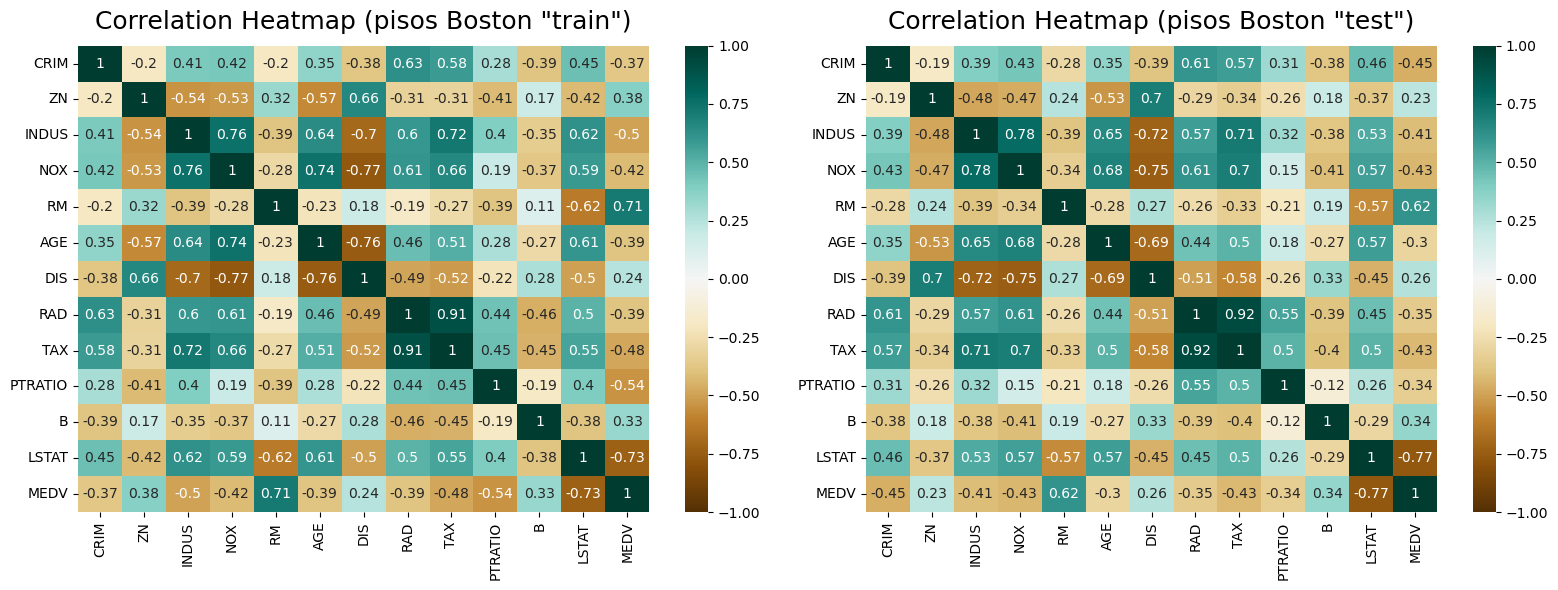

In [31]:
# Create a correlation matrix for both datasets
corr_matrix1 = p_Boston_train_sc.corr()
corr_matrix2 = p_Boston_test_sc.corr()

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first heatmap
heatmap1 = sns.heatmap(corr_matrix1, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=axs[0])
heatmap1.set_title('Correlation Heatmap (pisos Boston "train")', fontdict={'fontsize': 18}, pad=12)

# Plot second heatmap
heatmap2 = sns.heatmap(corr_matrix2, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=axs[1])
heatmap2.set_title('Correlation Heatmap (pisos Boston "test")', fontdict={'fontsize': 18}, pad=12)

# Adjust spacing between the subplots
plt.tight_layout()

# Save the figure as a .png file
plt.savefig('parallel_heatmaps.png')

# Show the plots
plt.show()

In [ ]:
Vemos algunas diferencias de matiz, pero en general el comportamiento es bastante parecido.

Podemos constatar, por ejemplo:

-Que la mayor correlación entre el crimen y otros factores es con la buena comunicación a autopistas radiales, "RAD" y alto nivel de impuestos a la propiedad "TAX". Esto sugiere que al menos uno de los factores en el crimen local se relaciona con un factor práctico: buena movilidad después de "dar el golpe", o bien que la autopista propicia de otra forma dicho crimen.

-Que la proporción de área residencial con parcelas grandes (>25000 pies cuadrados), "ZON", es mayor como más lejos de centros de actividad económica/empleo.

-Que como mayor "INDUS", más contaminación con óxidos de nitrógeno "NOX" hay.

-Un mayor índice de industria, "INDUS" correlaciona inversamente con la distancia a los principales centros de empleo. Como más industria, es que más cerca estamos de donde hay zonas de trabajo.

-En cambio, dicha contaminación "NOX" tiene correlación inversa con la distancia a los principales centros de empleo en Boston. También tiene sentido: como más lejos de donde hay ajetreo (e industria/trabajo), menos contaminación.

-Como mayor la distancia a las zonas con más actividad económica/trabajo, "DIS", menos industria, menos contaminación y menos "AGE", o sea menos viviendas de antes de 1940 que están ocupadas por sus propietarios (o sea, que nos movemos en una zona más nueva o poco habitada por sus propietarios, por ejemplo).

-Un mayor número de habitaciones, "RM", correlaciona con un mayor valor de la vivienda, "MEDV". Y tiene correlación inversa con el nivel de pobreza, como sugiere "LSTAT".

-Hay una correlación muy alta (>0.9) entre la accesibilidad a autopistas radiales (i.e. buena comunicación) y un mayor impuesto a la propiedad, "TAX". ¿Son zonas disputadas por bien comunicadas, lo cual eleva el precio de la propiedad y por lo tanto el impuesto a la propiedad?

-Hay una correlación inversa entre el valor mediano de las viviendas, "MEDV", y el índice de población pobre, "LSTAT". Como más caras las viviendas, menos población en la pobreza.

También podemos hacer un "pairplot" de las múltiples variables, o matrixplot:

C:\Users\karel\anaconda3\envs\py3.8.13\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\karel\anaconda3\envs\py3.8.13\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


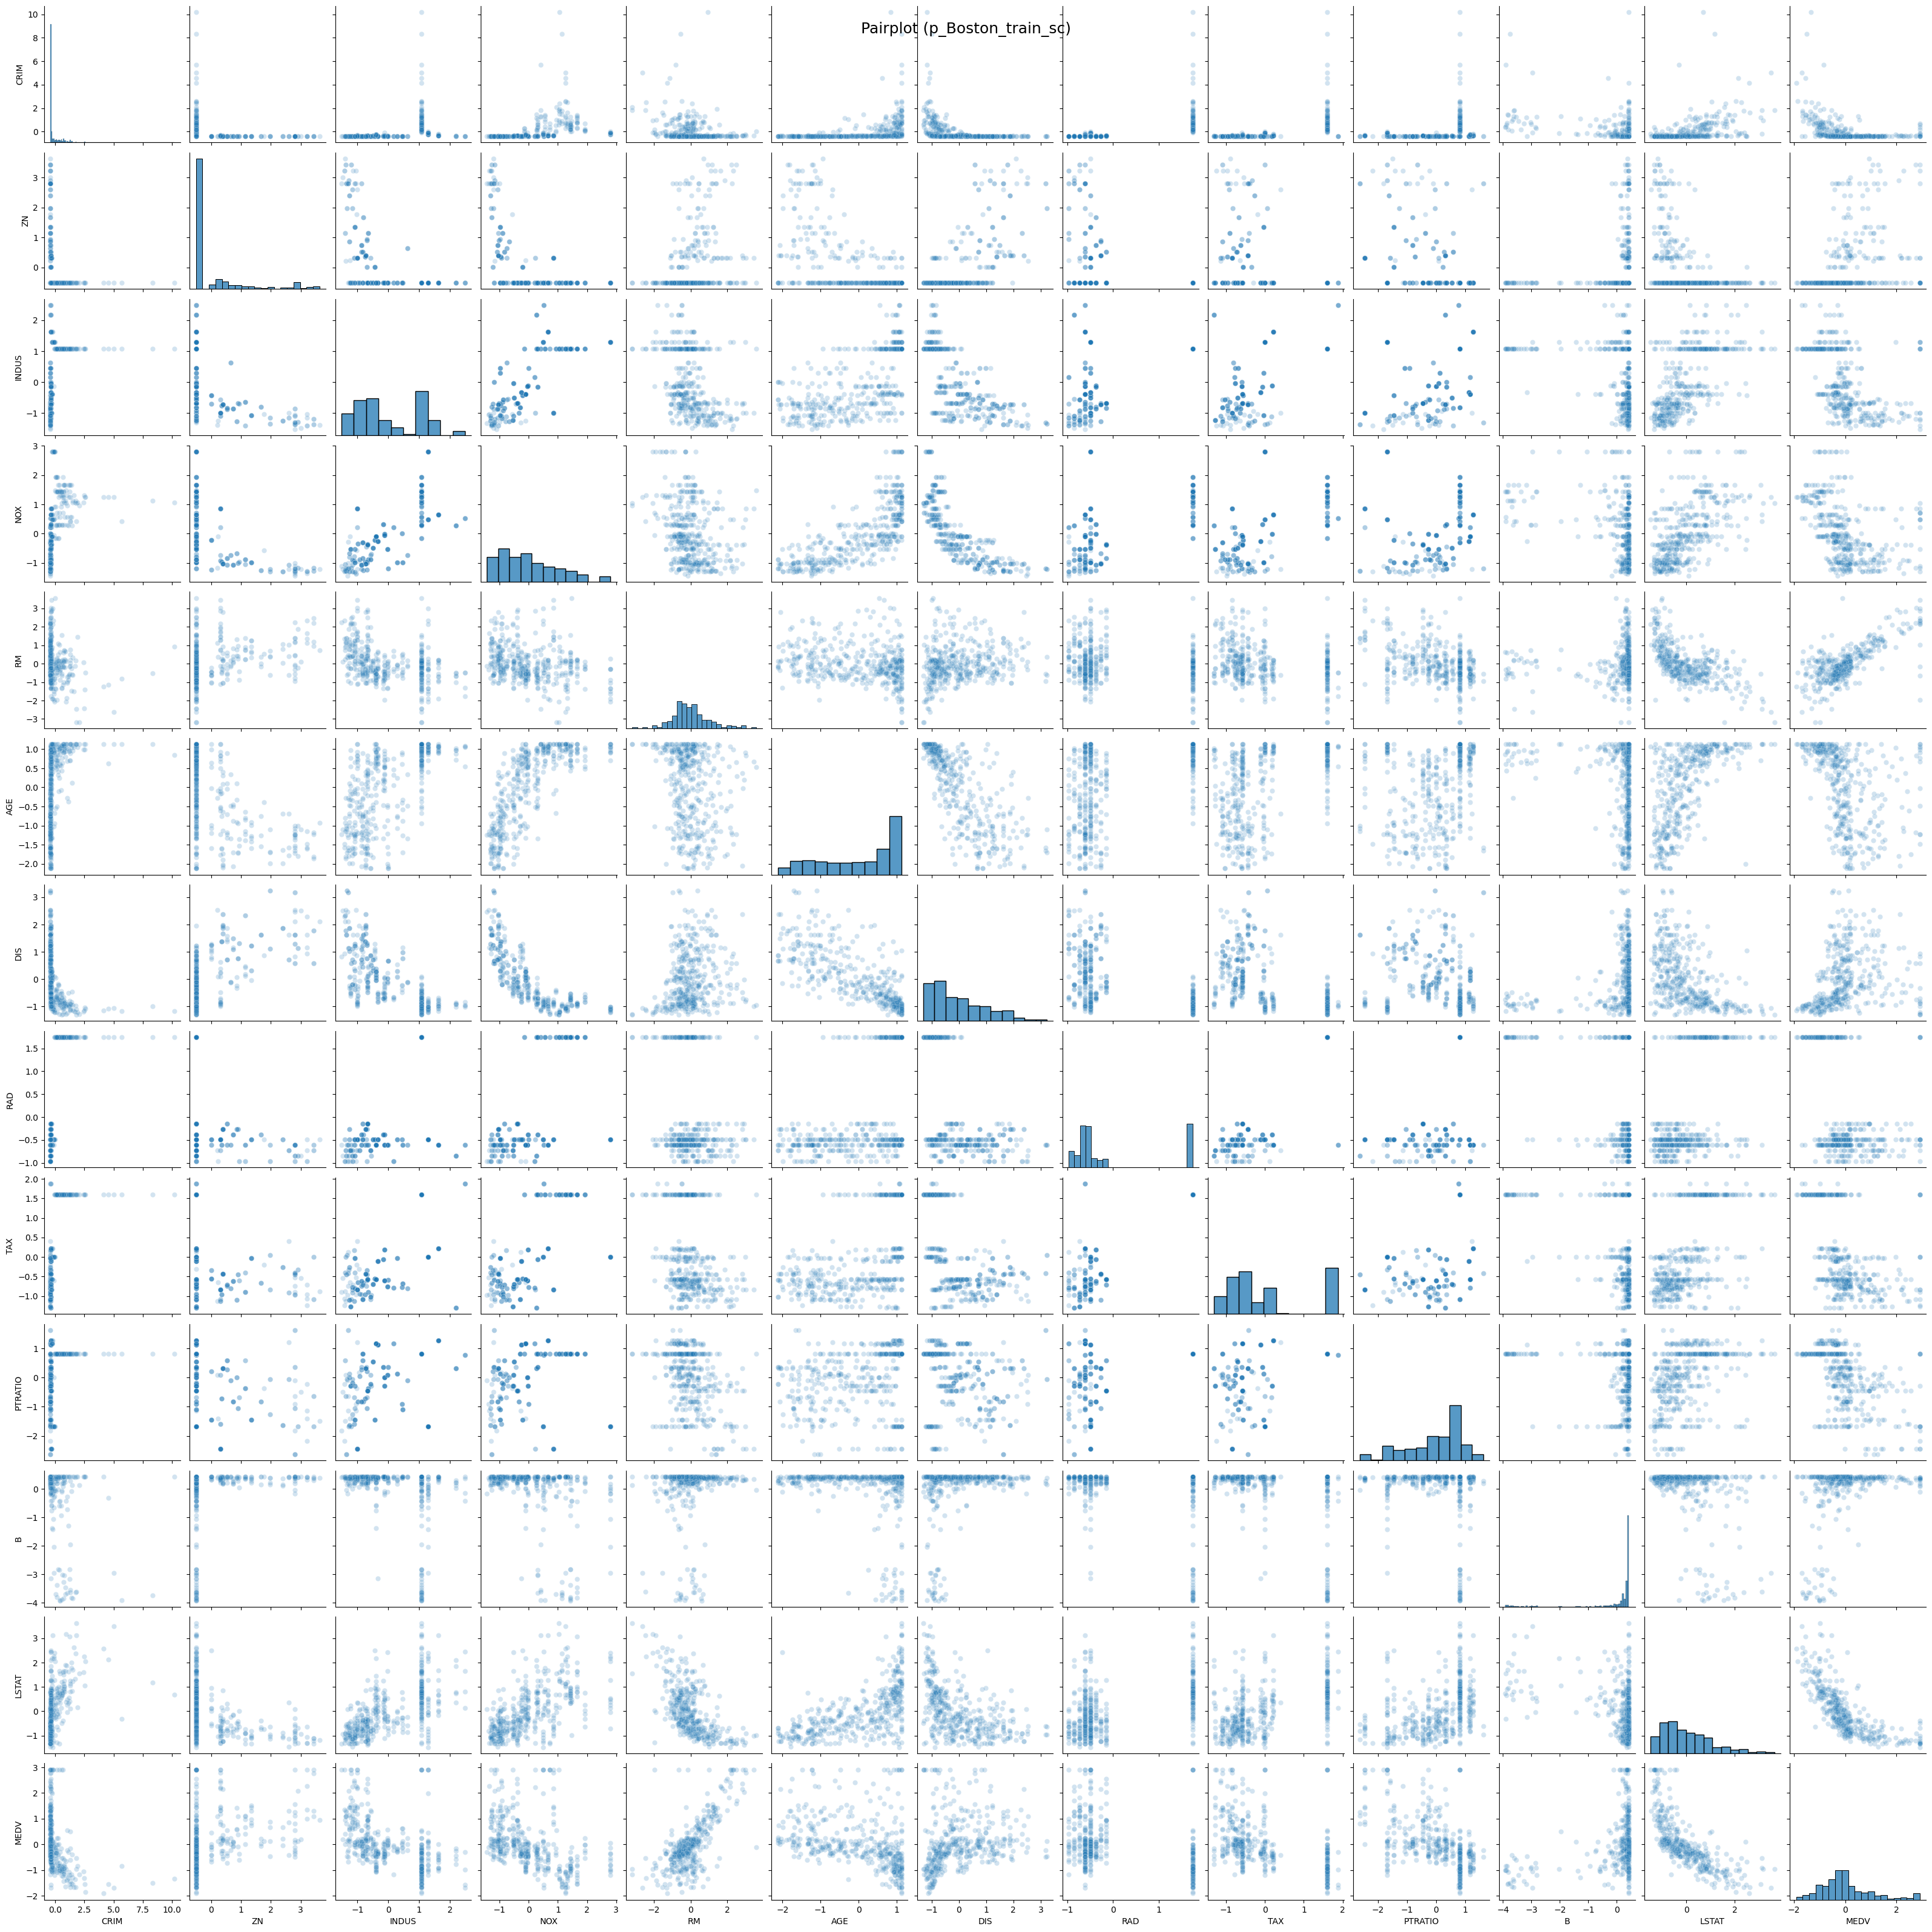

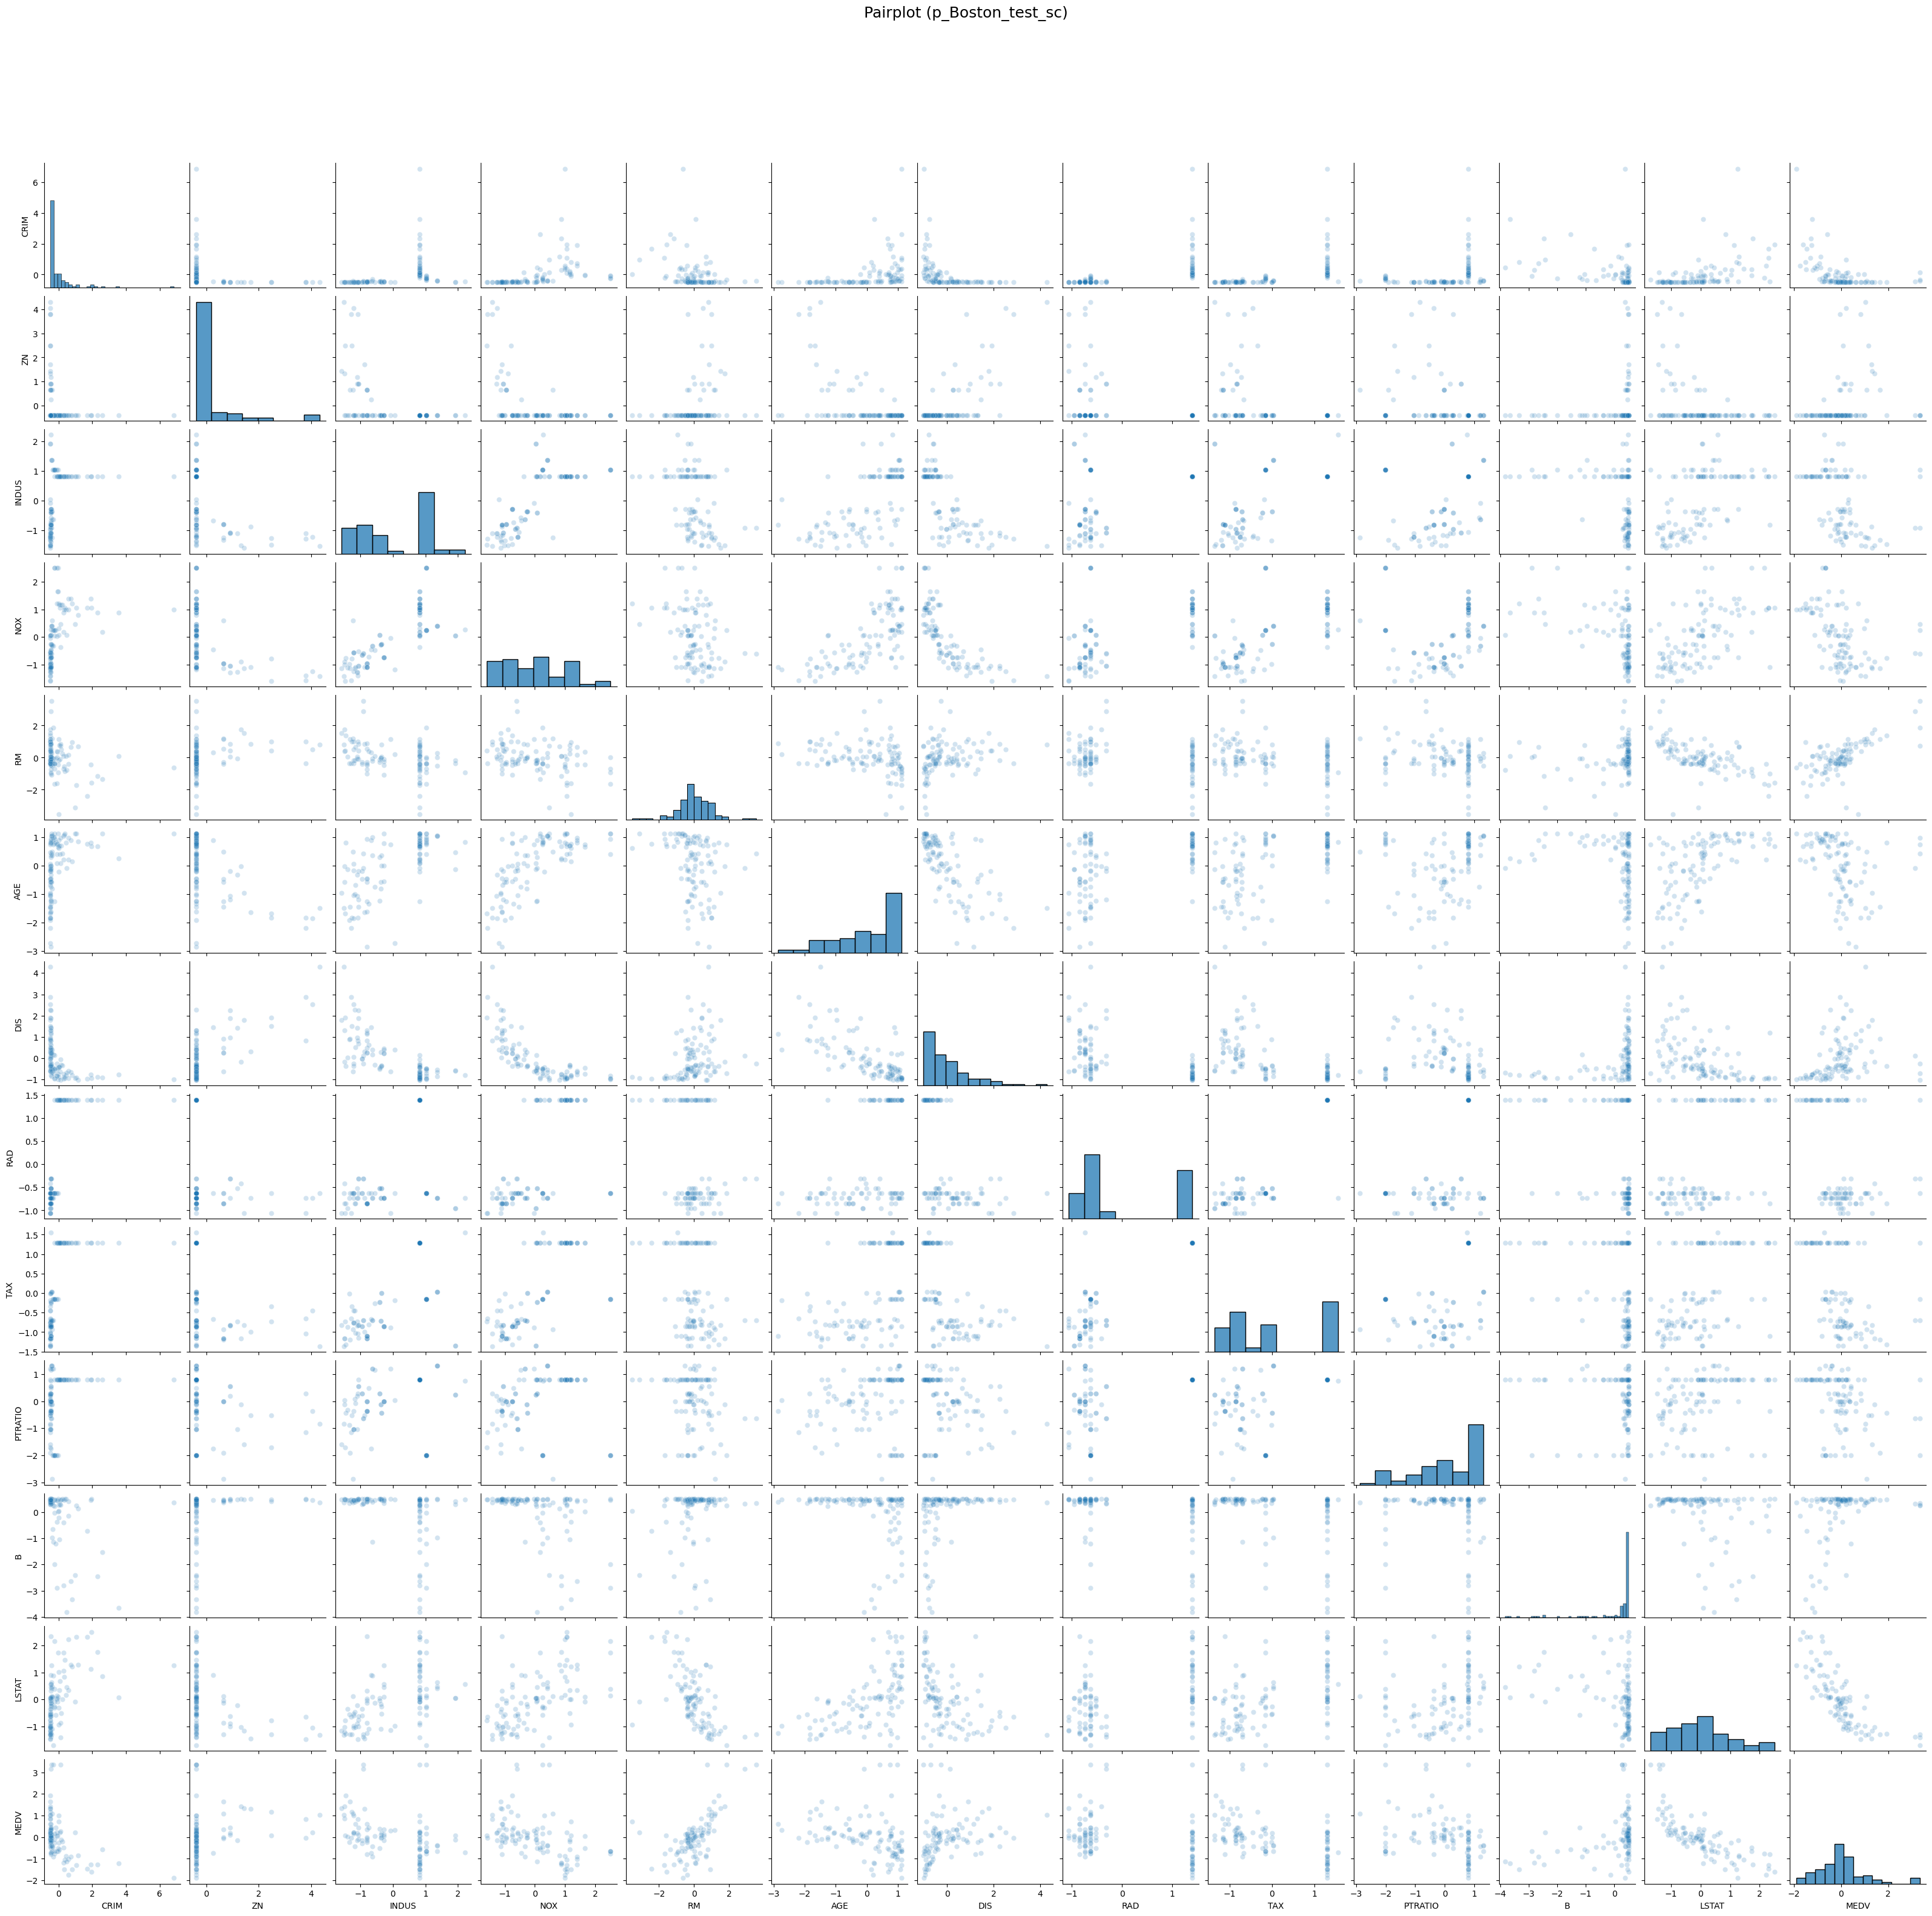

In [32]:
# Pairplot para los datos de entrenamiento
pairplot1 = sns.pairplot(p_Boston_train_sc, diag_kind='hist', plot_kws={'alpha': 0.2})
pairplot1.fig.suptitle('Pairplot (crudos)', fontsize=18)

# Pairplot para los datos de test
pairplot2 = sns.pairplot(p_Boston_test_sc, diag_kind='hist', plot_kws={'alpha': 0.2})
pairplot2.fig.suptitle('Pairplot (escalados)', fontsize=18)

# Adjust the spacing between the pairplots
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

Es una representación compleja, que para sacarle todo el jugo requiere un análisis muy pormenorizado.

En todo caso, a grandes rasgos:

-Como antes, vemos tendencias visualmente parecidas en ambos sets. Sí hay algunas diferencias, digamos de nuevo que "diferencias de matiz". Un ejemplo es el primer gráfico no es igual en el set "train" y el set "test", pero podemos encontrar alguno más.

-Observamos cómo la distribución de valores de cada variable (véase diagonal) lógicamente muestra distribuciones que reflejan el menor tamaño de muestra en el conjunto "test".

-Hay que resaltar que hay una serie de variables que tienen una relación, pero que si nos atenemos a lo que vemos visualmente, vemos que esta relación no es lineal.
Un ejemplo claro, podría ser si nos fijamos en el binomio 'NOX'-'AGE' (fila 4, columna 5), también con 'NOX'-'DIS' (fila 4, columna 6) pero en sentido inverso. Lo mismo podemos ver en bastantes casos más.

-Hay una serie de representaciones en las que se ven una suerte de "rayas" verticales u horizontales, que se ven muy influidas por el hecho de que haya una población muy alta de determinados valores (véanse por ejemplo las columnas 'INDUS',  'B', o sea las columnas 3 y 11 de la representación, por ejemplo).
